In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set(style="whitegrid", font_scale=1.1)

# Load cleaned dataset
df = pd.read_excel("final_dataset.xlsx")

# Standardize subgroup labels
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()


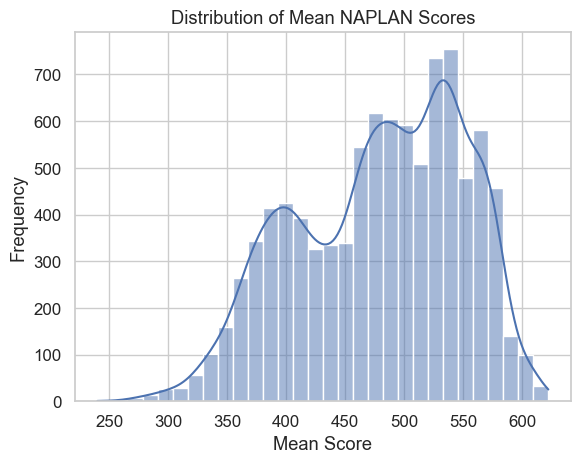

In [6]:
# Histogram of mean scores
sns.histplot(df["MEAN"], bins=30, kde=True)
plt.title("Distribution of Mean NAPLAN Scores")
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.show()

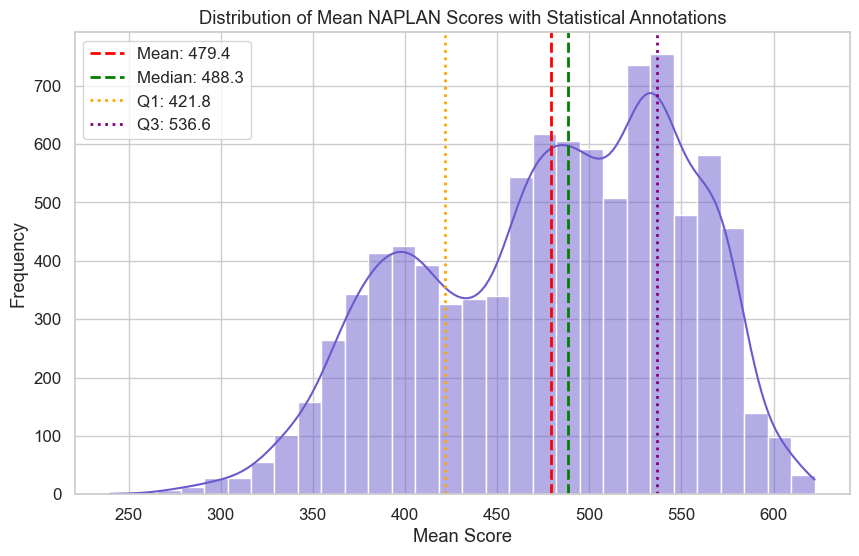

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set(style="whitegrid", font_scale=1.1)

# Load dataset
df = pd.read_excel("final_dataset.xlsx")

# Standardize subgroup labels
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Calculate statistics
mean_value = df["MEAN"].mean()
median_value = df["MEAN"].median()
q1 = df["MEAN"].quantile(0.25)
q3 = df["MEAN"].quantile(0.75)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["MEAN"], bins=30, kde=True, color="slateblue")

# Add vertical lines
plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_value:.1f}")
plt.axvline(median_value, color='green', linestyle='--', linewidth=2, label=f"Median: {median_value:.1f}")
plt.axvline(q1, color='orange', linestyle=':', linewidth=2, label=f"Q1: {q1:.1f}")
plt.axvline(q3, color='purple', linestyle=':', linewidth=2, label=f"Q3: {q3:.1f}")

# Labels and title
plt.title("Distribution of Mean NAPLAN Scores with Statistical Annotations")
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

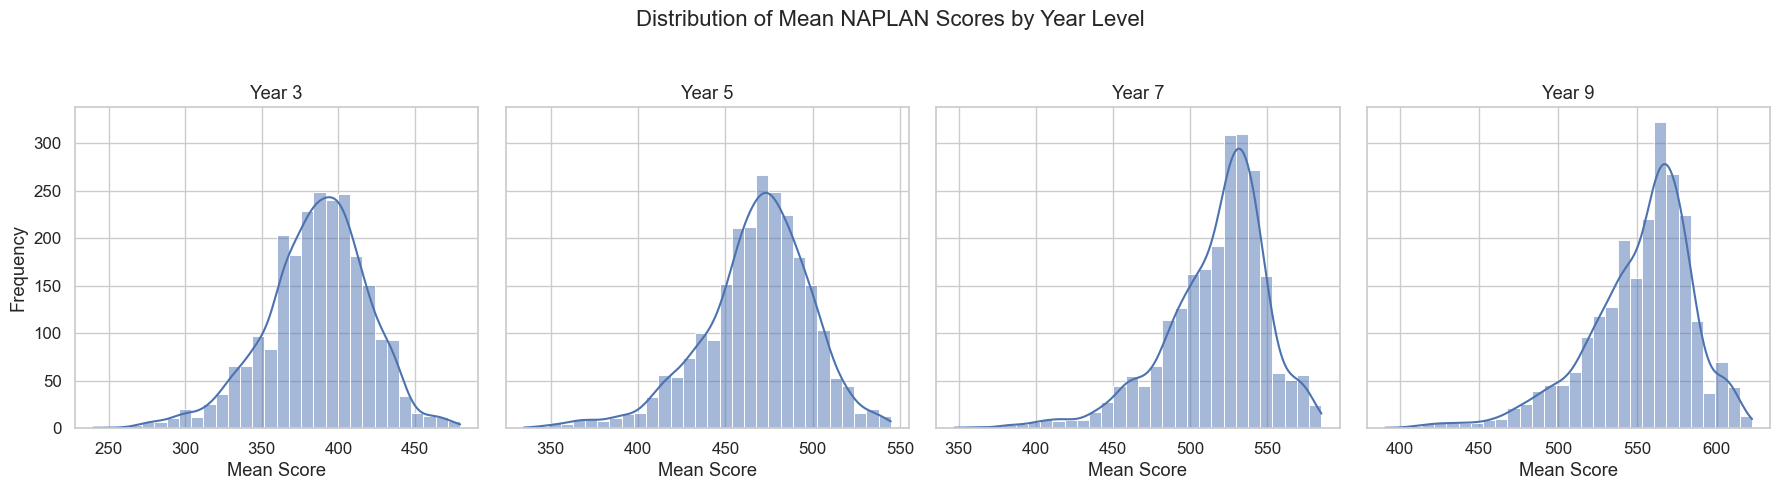

In [7]:
# Choose 3 year levels to visualize (adjust if needed)
year_levels = df["YEAR_LEVEL"].unique()

# Set up subplots
fig, axes = plt.subplots(1, len(year_levels), figsize=(18, 5), sharey=True)

for i, year in enumerate(year_levels):
    ax = axes[i]
    subset = df[df["YEAR_LEVEL"] == year]
    sns.histplot(subset["MEAN"], bins=30, kde=True, ax=ax)
    ax.set_title(f"Year {year}")
    ax.set_xlabel("Mean Score")
    if i == 0:
        ax.set_ylabel("Frequency")

plt.suptitle("Distribution of Mean NAPLAN Scores by Year Level", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

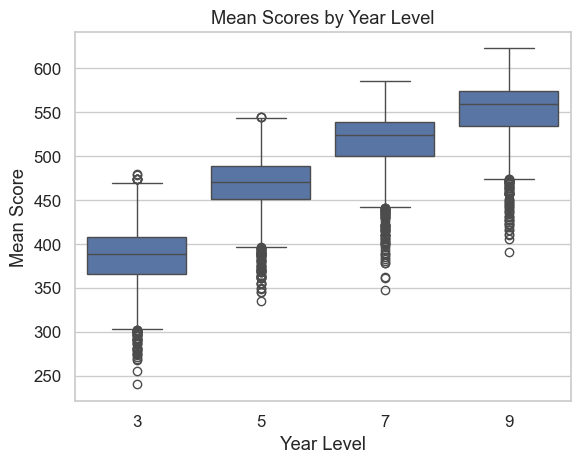

In [8]:
# Boxplot of scores by Year Level
sns.boxplot(x="YEAR_LEVEL", y="MEAN", data=df)
plt.title("Mean Scores by Year Level")
plt.xlabel("Year Level")
plt.ylabel("Mean Score")
plt.show()

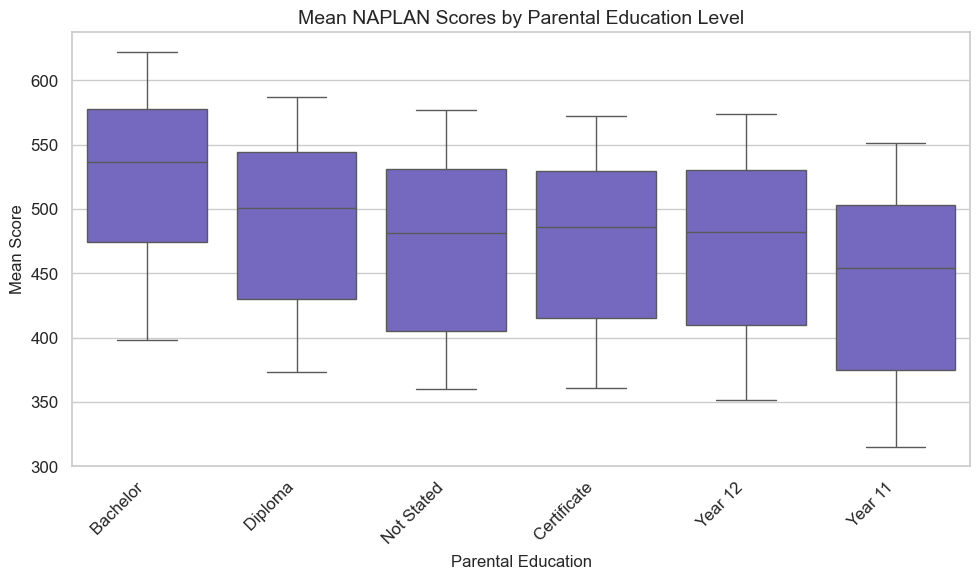

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()


edu_df = df[df["SUBGROUP"].str.contains("parental education", na=False)]


mean_scores = edu_df.groupby("SUBGROUP")["MEAN"].mean().sort_values(ascending=False)
ordered_labels = mean_scores.index.tolist()


clean_labels = [label.replace("parental education:", "").title() for label in ordered_labels]


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="SUBGROUP",
    y="MEAN",
    data=edu_df,
    order=ordered_labels,
    color="slateblue" 
)


plt.xticks(ticks=range(len(clean_labels)), labels=clean_labels, rotation=45, ha='right')


plt.title("Mean NAPLAN Scores by Parental Education Level", fontsize=14)
plt.xlabel("Parental Education", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()
plt.show()


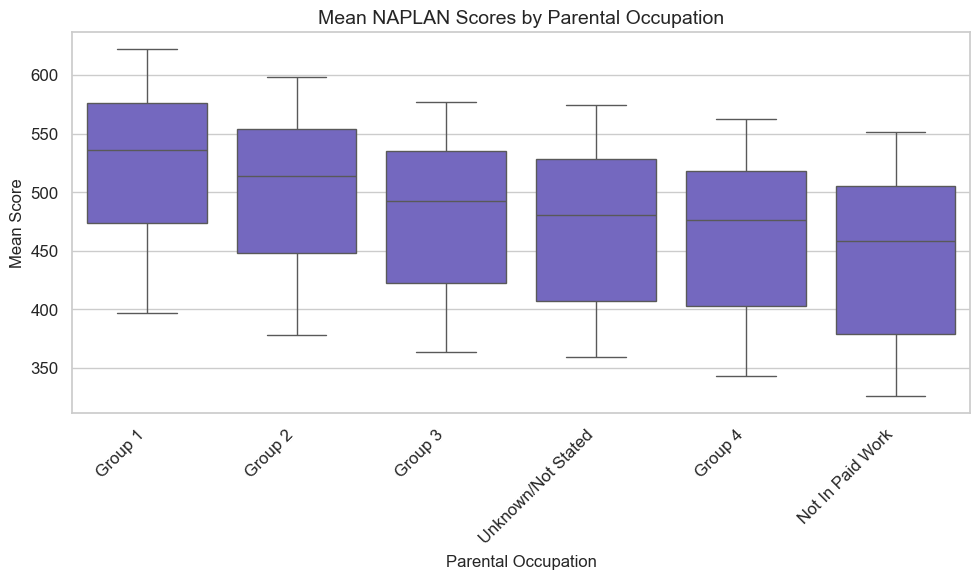

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()


edu_df = df[df["SUBGROUP"].str.contains("parental occupation", na=False)].copy()


edu_df['SUBGROUP'] = edu_df['SUBGROUP'].str.strip().str.lower()


edu_df['SUBGROUP'] = edu_df['SUBGROUP'].replace({
    "parental occupation: not stated": "parental occupation: unknown/not stated",
    "parental occupation not stated/unknown": "parental occupation: unknown/not stated"
})


mean_scores = edu_df.groupby("SUBGROUP")["MEAN"].mean().sort_values(ascending=False)
ordered_labels = mean_scores.index.tolist()


clean_labels = [label.replace("parental occupation:", "").title() for label in ordered_labels]


plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="SUBGROUP",
    y="MEAN",
    data=edu_df,
    order=ordered_labels,
    color="slateblue"
)


plt.xticks(ticks=range(len(clean_labels)), labels=clean_labels, rotation=45, ha='right')


plt.title("Mean NAPLAN Scores by Parental Occupation", fontsize=14)
plt.xlabel("Parental Occupation", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_24612\154849657.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="SUBGROUP", y="MEAN", data=gender_df, palette="pastel")


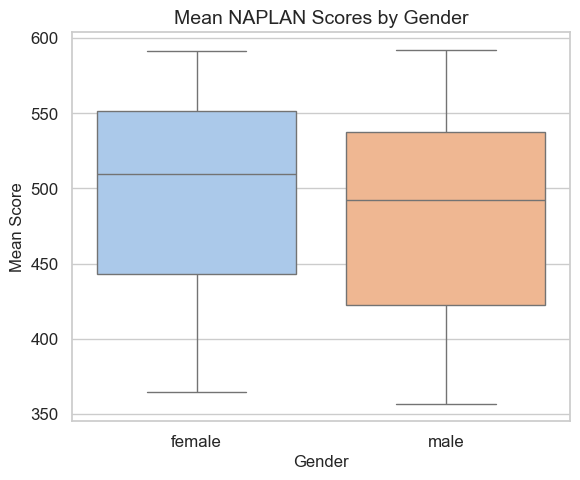

In [28]:
# Filter by Gender
# Ensure SUBGROUP is lowercase and stripped
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Filter for gender subgroups only
gender_df = df[df["SUBGROUP"].isin(["male", "female"])]

# Create boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(x="SUBGROUP", y="MEAN", data=gender_df, palette="pastel")
plt.title("Mean NAPLAN Scores by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Score", fontsize=12)
plt.tight_layout()
plt.show()

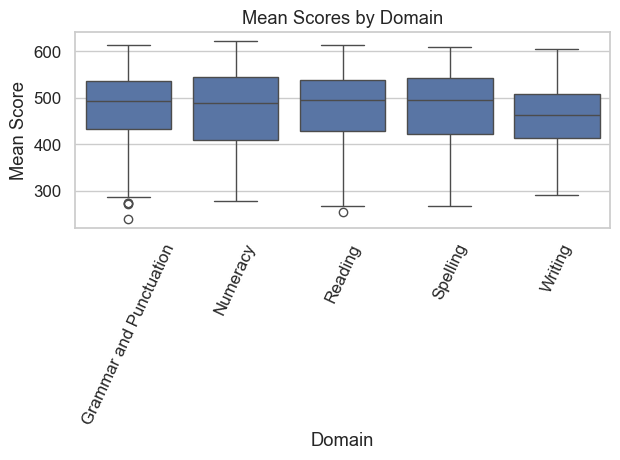

In [10]:
# Filter by Domain
domain_df = df[df["DOMAIN"].notnull()]

sns.boxplot(x="DOMAIN", y="MEAN", data=domain_df)
plt.xticks(rotation=65)
plt.title("Mean Scores by Domain")
plt.xlabel("Domain")
plt.ylabel("Mean Score")
plt.tight_layout()
plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_24612\942711067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parent_edu_summary.values, y=parent_edu_summary.index, palette="viridis")


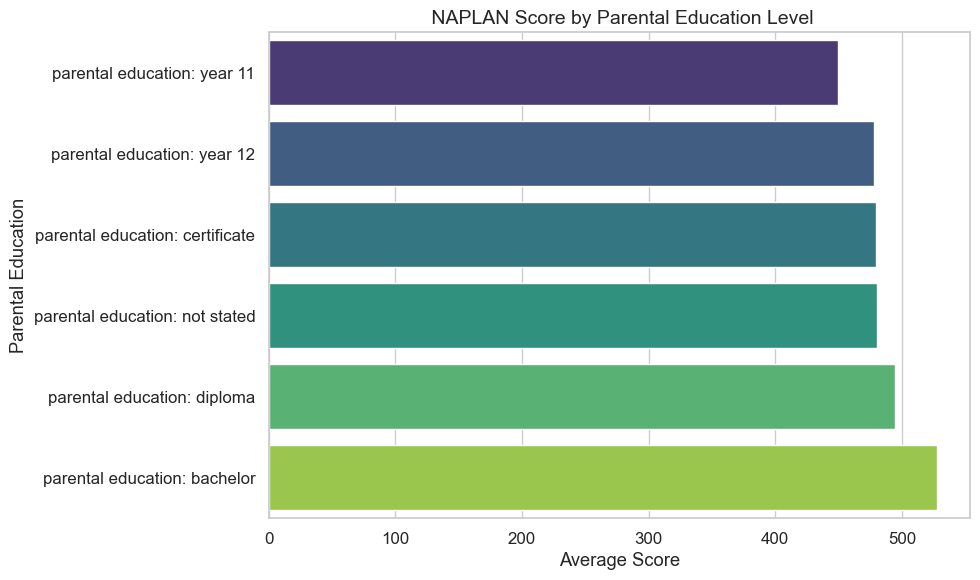

In [11]:
# Filter and summarize by parental education
parent_edu = df[df['SUBGROUP'].str.contains("parental education")]
parent_edu_summary = parent_edu.groupby("SUBGROUP")["MEAN"].mean().sort_values()

# Horizontal barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=parent_edu_summary.values, y=parent_edu_summary.index, palette="viridis")
plt.title(" NAPLAN Score by Parental Education Level", fontsize=14)
plt.xlabel("Average Score")
plt.ylabel("Parental Education")
plt.tight_layout()
plt.show()


C:\Users\henry\AppData\Local\Temp\ipykernel_19292\1507582399.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=urban_summary.values, y=urban_summary.index, palette="magma")


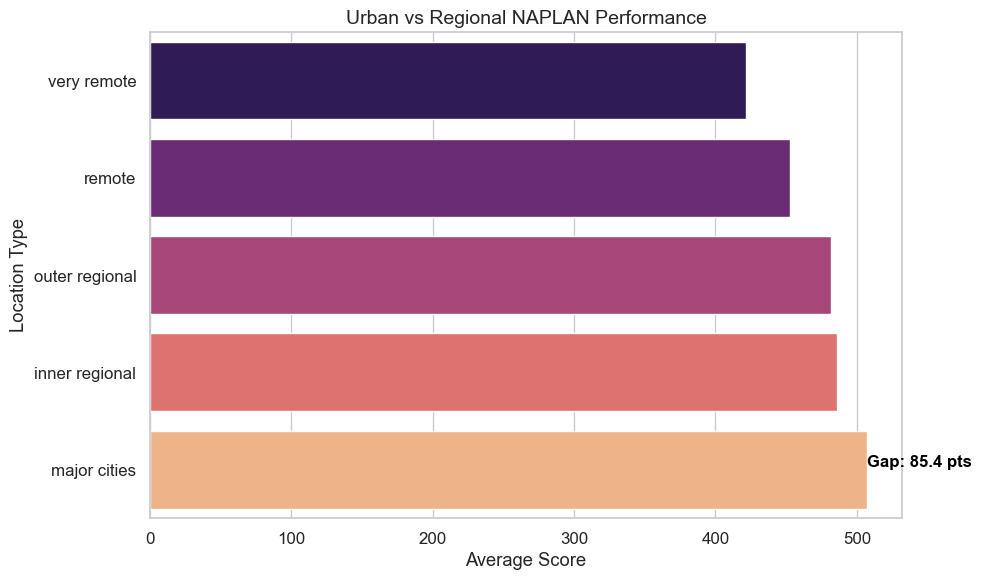

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


urban_keywords = ["major cities", "inner regional", "outer regional", "remote", "very remote"]
urban_regional = df[df['SUBGROUP'].str.strip().str.lower().isin(urban_keywords)]


urban_summary = urban_regional.groupby("SUBGROUP")["MEAN"].mean().sort_values()


lowest = urban_summary.iloc[0]
highest = urban_summary.iloc[-1]
gap = highest - lowest


plt.figure(figsize=(10, 6))
ax = sns.barplot(x=urban_summary.values, y=urban_summary.index, palette="magma")


plt.text(
    x=highest, 
    y=len(urban_summary) - 1, 
    s=f"Gap: {gap:.1f} pts", 
    color="black", 
    fontsize=12, 
    weight="bold", 
    ha="left",
    va="bottom"
)

plt.title("Urban vs Regional NAPLAN Performance", fontsize=14)
plt.xlabel("Average Score")
plt.ylabel("Location Type")
plt.tight_layout()
plt.show()


C:\Users\henry\AppData\Local\Temp\ipykernel_19292\2368036965.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=indig_summary.values, y=indig_summary.index, palette="Set2")


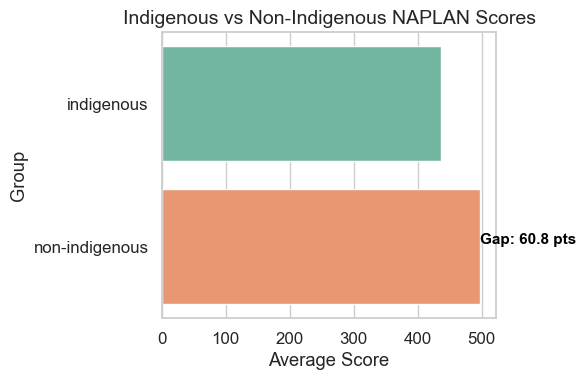

In [10]:
indig = df[df['SUBGROUP'].str.strip().str.lower().isin(["indigenous", "non-indigenous"])]
indig_summary = indig.groupby("SUBGROUP")["MEAN"].mean().sort_values()


low = indig_summary.iloc[0]
high = indig_summary.iloc[1]
gap = high - low


plt.figure(figsize=(6, 4))
ax = sns.barplot(x=indig_summary.values, y=indig_summary.index, palette="Set2")


plt.text(
    x=high,
    y=1,
    s=f"Gap: {gap:.1f} pts",
    fontsize=11,
    weight='bold',
    color='black',
    va='bottom'
)

plt.title("Indigenous vs Non-Indigenous NAPLAN Scores", fontsize=14)
plt.xlabel("Average Score")
plt.ylabel("Group")
plt.tight_layout()
plt.show()

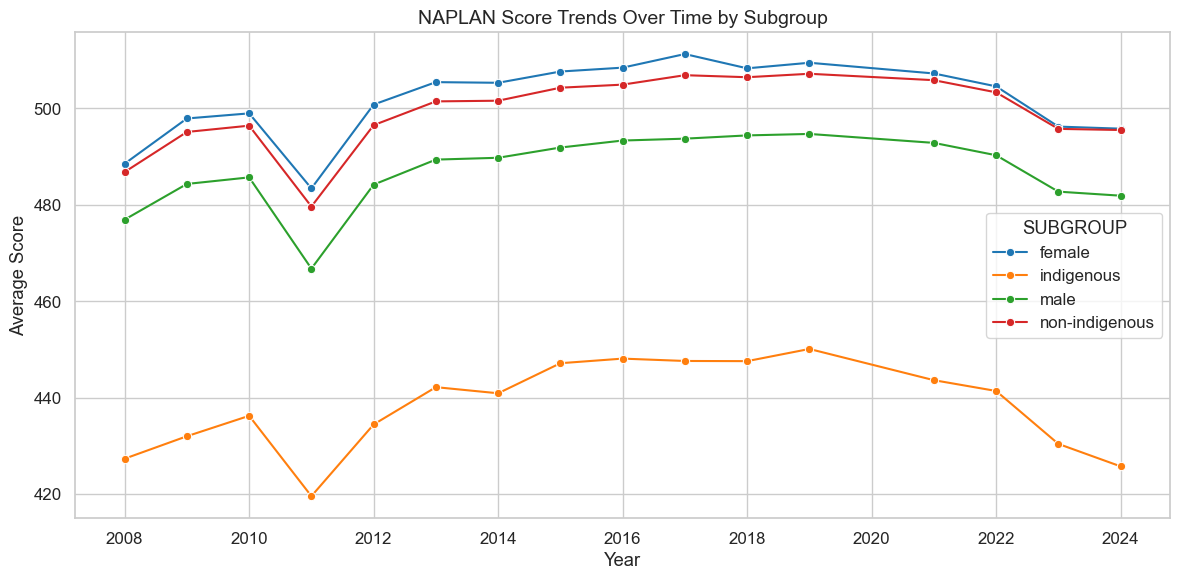

In [14]:
# Select key subgroups
trend_subgroups = ["indigenous", "non-indigenous", "female", "male"]
trend_data = df[df['SUBGROUP'].isin(trend_subgroups)]
trend_grouped = trend_data.groupby(["CALENDAR_YEAR", "SUBGROUP"])["MEAN"].mean().reset_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_grouped, x="CALENDAR_YEAR", y="MEAN", hue="SUBGROUP", marker="o", palette="tab10")
plt.title("NAPLAN Score Trends Over Time by Subgroup", fontsize=14)
plt.ylabel("Average Score")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ensure lowercase and filtered subgroup data
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()
parent_edu_data = df[df['SUBGROUP'].str.contains("parental education")]

# Drop NaNs to avoid errors in test
parent_edu_data = parent_edu_data[['SUBGROUP', 'MEAN']].dropna()

# Apply Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=parent_edu_data['MEAN'],
                          groups=parent_edu_data['SUBGROUP'],
                          alpha=0.05)

# Print summary
print(tukey.summary())


                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                           
             group1                          group2             meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------------------------------------
   parental education: bachelor parental education: certificate -47.8714    0.0 -61.8721 -33.8707   True
   parental education: bachelor     parental education: diploma -33.0612    0.0 -47.0619 -19.0605   True
   parental education: bachelor  parental education: not stated -47.7286    0.0 -61.7293  -33.728   True
   parental education: bachelor     parental education: year 11 -78.3908    0.0 -92.3915 -64.3902   True
   parental education: bachelor     parental education: year 12 -49.8089    0.0 -63.8096 -35.8082   True
parental education: certificate     parental education: diploma  14.8102 0.0309   0.8095  28.8109   True
parental education: certificate  parental education: no

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your cleaned dataset
df = pd.read_excel("final_dataset.xlsx")

# --- Step 1: Preprocessing ---
# Standardize subgroup labels
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Select features and target
features = ["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR"]
target = "MEAN"

# Drop missing values
model_data = df[features + [target]].dropna()

# Split data into features and labels
X = model_data[features]
y = model_data[target]

# Define categorical and numerical columns
categorical_features = ["DOMAIN", "SUBGROUP"]
numerical_features = ["YEAR_LEVEL", "CALENDAR_YEAR"]

# --- Step 2: Create Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"  # Leave numerical columns as is
)

# Combine preprocessing and model
reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# --- Step 3: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 4: Train the Model ---
reg_pipeline.fit(X_train, y_train)

# --- Step 5: Evaluate the Model ---
y_pred = reg_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


 Linear Regression Model Evaluation:
Mean Squared Error (MSE): 368.43
R² Score: 0.9276


Classification Report:

              precision    recall  f1-score   support

        High       0.97      0.96      0.97       817
         Low       0.95      0.94      0.94       339
      Medium       0.93      0.95      0.94       719

    accuracy                           0.95      1875
   macro avg       0.95      0.95      0.95      1875
weighted avg       0.95      0.95      0.95      1875



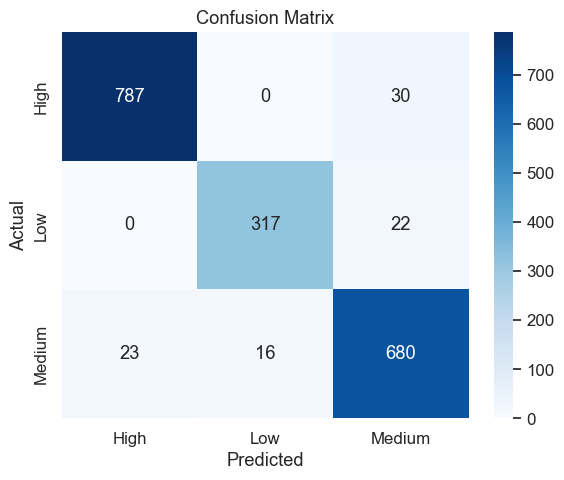

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_excel("final_dataset.xlsx")
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Label performance bands
def label_band(score):
    if score < 400:
        return "Low"
    elif 400 <= score < 500:
        return "Medium"
    else:
        return "High"

df['PERFORMANCE_BAND'] = df['MEAN'].apply(label_band)

# Select relevant columns and drop missing
model_data = df[["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR", "PERFORMANCE_BAND"]].dropna()

# Features and target
X = model_data[["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR"]]
y = model_data["PERFORMANCE_BAND"]

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing pipeline (One-Hot Encoding)
categorical_features = ["DOMAIN", "SUBGROUP"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)],
    remainder="passthrough"
)

# Random Forest Classifier Pipeline
clf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train model
clf_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf_pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print classification report
print("Classification Report:\n")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


C:\Users\henry\anaconda3\envs\proj7001\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.94      0.94      0.94       817
         Low       0.84      0.88      0.86       339
      Medium       0.87      0.85      0.86       719

    accuracy                           0.89      1875
   macro avg       0.88      0.89      0.88      1875
weighted avg       0.89      0.89      0.89      1875



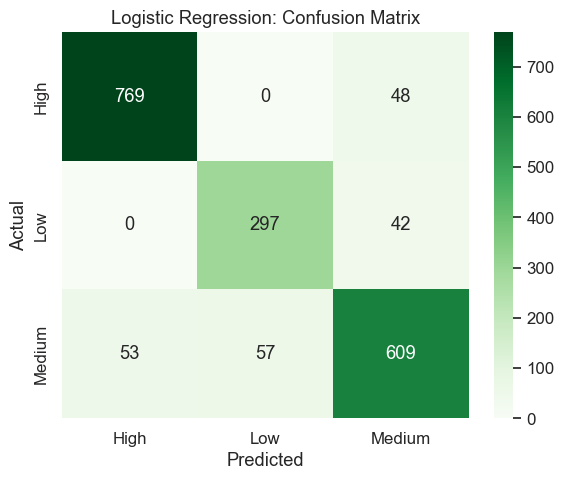

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load and prepare data
df = pd.read_excel("final_dataset.xlsx")
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Create performance band labels
def label_band(score):
    if score < 400:
        return "Low"
    elif 400 <= score < 500:
        return "Medium"
    else:
        return "High"

df['PERFORMANCE_BAND'] = df['MEAN'].apply(label_band)

# Select features and drop missing values
model_data = df[["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR", "PERFORMANCE_BAND"]].dropna()
X = model_data[["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR"]]
y = model_data["PERFORMANCE_BAND"]

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing pipeline
categorical_features = ["DOMAIN", "SUBGROUP"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)],
    remainder="passthrough"
)

# Build logistic regression pipeline
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print evaluation
print("Logistic Regression Classification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Logistic Regression: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


C:\Users\henry\anaconda3\envs\proj7001\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:57:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\henry\anaconda3\envs\proj7001\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


XGBoost Classification Report:

              precision    recall  f1-score   support

        High       0.97      0.96      0.97       817
         Low       0.94      0.96      0.95       339
      Medium       0.94      0.93      0.93       719

    accuracy                           0.95      1875
   macro avg       0.95      0.95      0.95      1875
weighted avg       0.95      0.95      0.95      1875



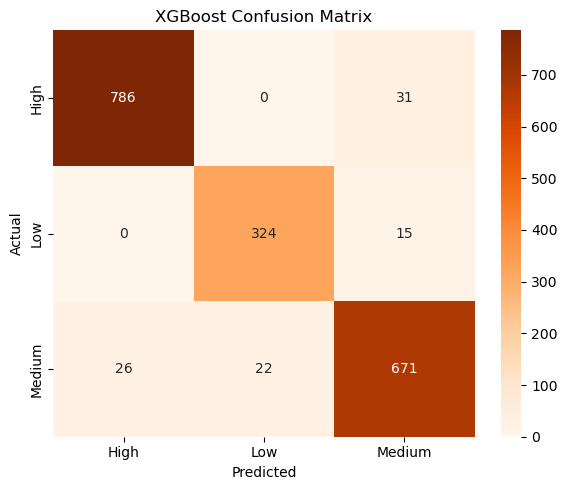

In [1]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.base import BaseEstimator, ClassifierMixin

class XGBWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        self.model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", **kwargs)
    
    def fit(self, X, y):
        return self.model.fit(X, y)
    
    def predict(self, X):
        return self.model.predict(X)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)
    
    def score(self, X, y):
        return self.model.score(X, y)

wrapped_model = XGBWrapper(n_estimators=100, max_depth=4, random_state=42)


# Load and prepare data
df = pd.read_excel("final_dataset.xlsx")
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Create performance band labels
def label_band(score):
    if score < 400:
        return "Low"
    elif 400 <= score < 500:
        return "Medium"
    else:
        return "High"

df['PERFORMANCE_BAND'] = df['MEAN'].apply(label_band)

# prepare data
model_data = df[["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR", "PERFORMANCE_BAND"]].dropna()
X = model_data[["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR"]]
y = model_data["PERFORMANCE_BAND"]

# label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot code + model
categorical_features = ["DOMAIN", "SUBGROUP"]
preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)],
    remainder="passthrough"
)

xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", wrapped_model)
])


# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Predict and evaluate
xgb_pipeline.fit(X_train, y_train)

# Print evaluation
y_pred = xgb_pipeline.predict(X_test)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("XGBoost Classification Report:\n")
print(report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


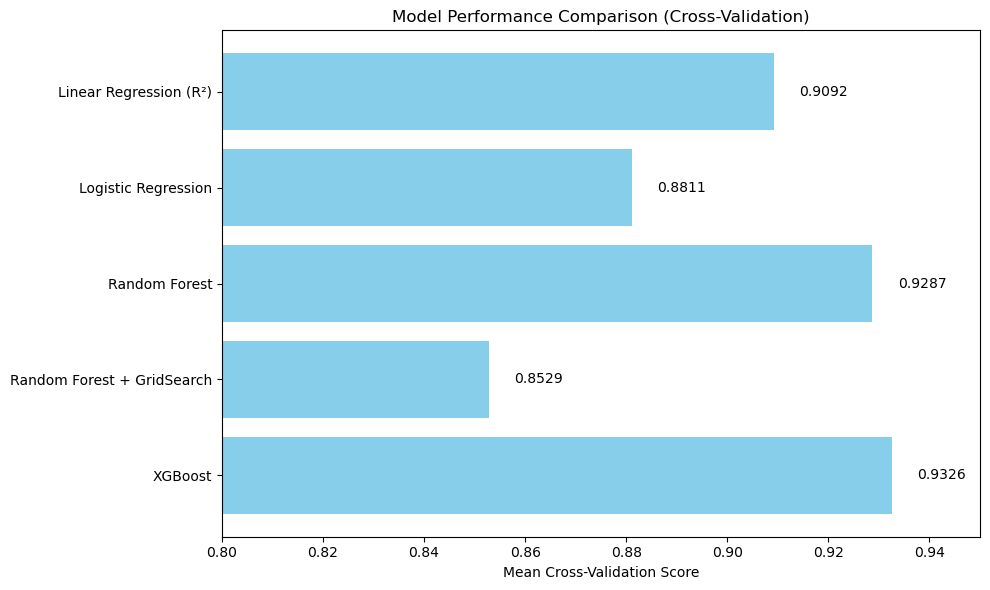

In [2]:
import matplotlib.pyplot as plt

# Model names and mean scores
models = [
    "Linear Regression (R²)",
    "Logistic Regression",
    "Random Forest",
    "Random Forest + GridSearch",
    "XGBoost"
]
scores = [0.9092, 0.8811, 0.9287, 0.8529, 0.9326]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color="skyblue")
plt.xlabel("Mean Cross-Validation Score")
plt.title("Model Performance Comparison (Cross-Validation)")

# Add score labels
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.4f}", va='center')

plt.xlim(0.8, 0.95)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


C:\Users\henry\AppData\Local\Temp\ipykernel_24612\3876072442.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subgroup_means.head(15).values, y=subgroup_means.head(15).index, palette="viridis")


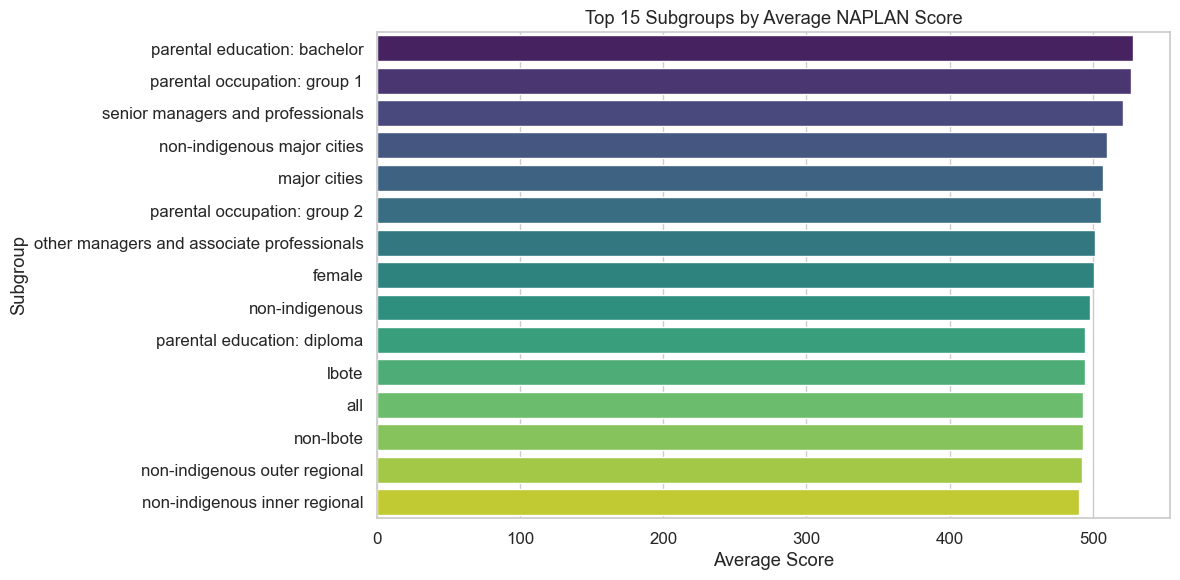

In [18]:
# 📌 NAPLAN Insights Analysis (Python + Markdown)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_excel("final_dataset.xlsx")
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# --- 🔍 1. Strongest Predictors of NAPLAN Score ---
# Group by SUBGROUP and calculate average score
subgroup_means = df.groupby("SUBGROUP")["MEAN"].mean().sort_values(ascending=False)

# Plot top 15 subgroups
plt.figure(figsize=(12, 6))
sns.barplot(x=subgroup_means.head(15).values, y=subgroup_means.head(15).index, palette="viridis")
plt.title("Top 15 Subgroups by Average NAPLAN Score")
plt.xlabel("Average Score")
plt.ylabel("Subgroup")
plt.tight_layout()
plt.show()








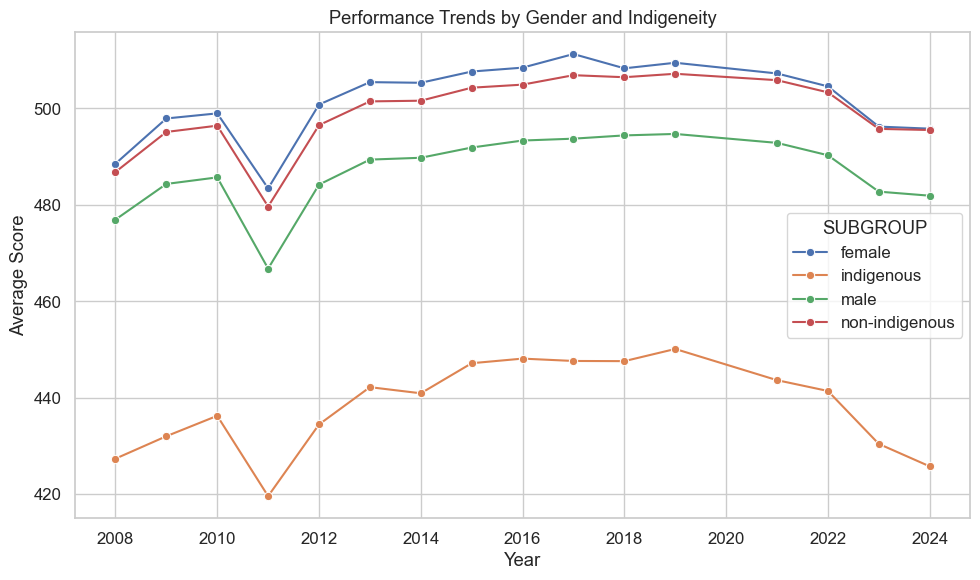

In [69]:
# --- 🧬 2. Gender and Indigeneity Over Time ---
gender_indig = df[df['SUBGROUP'].isin(['male', 'female', 'indigenous', 'non-indigenous'])]
grouped_gender_indig = gender_indig.groupby(['CALENDAR_YEAR', 'SUBGROUP'])['MEAN'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_gender_indig, x="CALENDAR_YEAR", y="MEAN", hue="SUBGROUP", marker="o")
plt.title("Performance Trends by Gender and Indigeneity")
plt.ylabel("Average Score")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\henry\AppData\Local\Temp\ipykernel_24612\1002380804.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MEAN", y="SUBGROUP", data=risk_subgroups, palette="Reds_r")


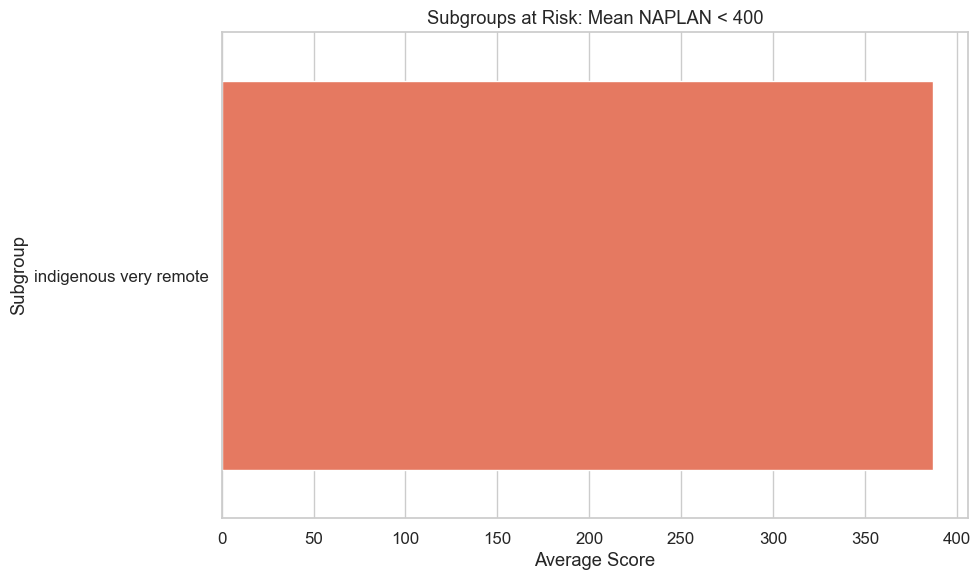

In [19]:
# --- ⚠️ 3. Subgroups at Risk (Below 400) ---
risk_df = df.groupby("SUBGROUP")["MEAN"].mean().reset_index()
risk_subgroups = risk_df[risk_df["MEAN"] < 400].sort_values("MEAN")

plt.figure(figsize=(10, 6))
sns.barplot(x="MEAN", y="SUBGROUP", data=risk_subgroups, palette="Reds_r")
plt.title("Subgroups at Risk: Mean NAPLAN < 400")
plt.xlabel("Average Score")
plt.ylabel("Subgroup")
plt.tight_layout()
plt.show()

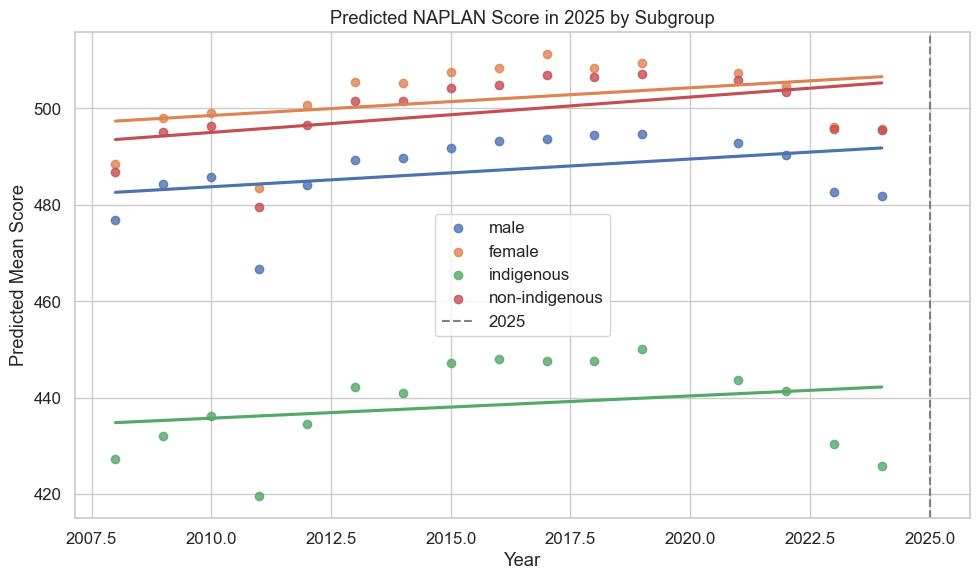

In [73]:

# --- 📈 4. Predict 2025 Performance using Trend Line ---
# Use historical trend to extrapolate 2025 average for each subgroup
target_subgroups = ['male', 'female', 'indigenous', 'non-indigenous']
pred_data = grouped_gender_indig[grouped_gender_indig['SUBGROUP'].isin(target_subgroups)]

# Plot trend lines and extrapolated point for 2025
plt.figure(figsize=(10, 6))
for group in target_subgroups:
    grp = pred_data[pred_data['SUBGROUP'] == group]
    sns.regplot(x=grp['CALENDAR_YEAR'], y=grp['MEAN'], label=group, order=1, ci=None)

plt.axvline(2025, color='gray', linestyle='--', label='2025')
plt.title("Predicted NAPLAN Score in 2025 by Subgroup")
plt.xlabel("Year")
plt.ylabel("Predicted Mean Score")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
#Cross-Validation for Logistic Regression (Classification)


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Use same preprocessing pipeline
logreg_cv_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Run 5-fold cross-validation using accuracy
cv_scores_logreg = cross_val_score(logreg_cv_pipeline, X, y_encoded, cv=5, scoring='accuracy')

print(" Logistic Regression Cross-Validation Results:")
print("Accuracy per fold:", cv_scores_logreg)
print("Mean Accuracy:", round(cv_scores_logreg.mean(), 4))


C:\Users\henry\anaconda3\envs\proj7001\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\henry\anaconda3\envs\proj7001\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

 Logistic Regression Cross-Validation Results:
Accuracy per fold: [0.91146667 0.89066667 0.8464     0.90715048 0.85005336]
Mean Accuracy: 0.8811


C:\Users\henry\anaconda3\envs\proj7001\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_cv_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

cv_scores_rf = cross_val_score(rf_cv_pipeline, X, y_encoded, cv=5, scoring='accuracy')

print(" Random Forest Cross-Validation Results:")
print("Accuracy per fold:", cv_scores_rf)
print("Mean Accuracy:", round(cv_scores_rf.mean(), 4))


 Random Forest Cross-Validation Results:
Accuracy per fold: [0.95733333 0.936      0.93226667 0.93383138 0.88420491]
Mean Accuracy: 0.9287


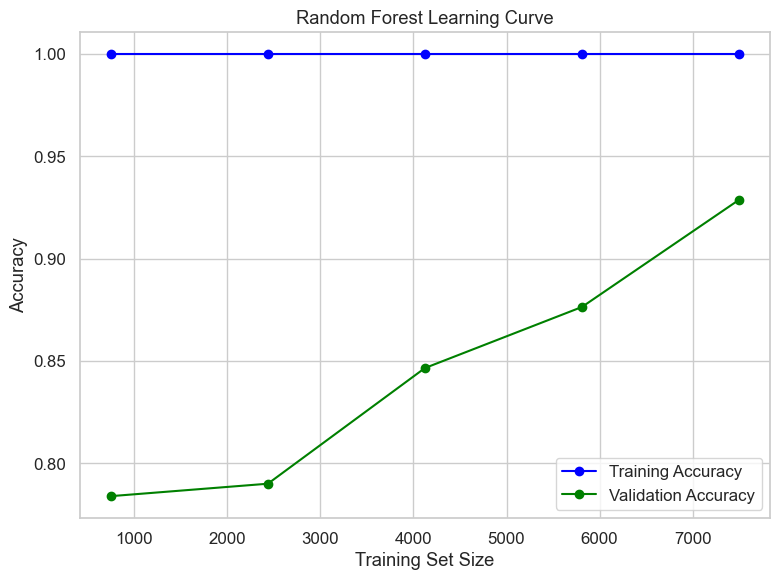

In [22]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_cv_pipeline, X, y_encoded, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

# Compute average scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation Accuracy", color="green")
plt.title("Random Forest Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Grid search setup with the pipeline
grid_search = GridSearchCV(rf_cv_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit to data
grid_search.fit(X, y_encoded)

# Best parameters and score
print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
print("Best Cross-Validated Accuracy:", round(grid_search.best_score_, 4))

Best Parameters from Grid Search:
{'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Best Cross-Validated Accuracy: 0.8529


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_excel("final_dataset.xlsx")

# Clean subgroup column
df['SUBGROUP'] = df['SUBGROUP'].str.strip().str.lower()

# Select relevant columns
features = ["YEAR_LEVEL", "DOMAIN", "SUBGROUP", "CALENDAR_YEAR"]
target = "MEAN"

# Drop rows with missing values
model_data = df[features + [target]].dropna()

# Split into X and y
X = model_data[features]
y = model_data[target]

# Define categorical features for one-hot encoding
categorical_features = ["DOMAIN", "SUBGROUP"]
numerical_features = ["YEAR_LEVEL", "CALENDAR_YEAR"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="passthrough"
)

# Combine preprocessor and Linear Regression into a pipeline
reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Perform 5-fold cross-validation using R² as the scoring metric
cv_scores_reg = cross_val_score(reg_pipeline, X, y, cv=5, scoring='r2')

# Display results
print("Linear Regression Cross-Validation R² Scores:")
print("R² per fold:", cv_scores_reg)
print("Mean R²:", round(cv_scores_reg.mean(), 4))


Linear Regression Cross-Validation R² Scores:
R² per fold: [0.92603475 0.93145744 0.911987   0.92071017 0.85583295]
Mean R²: 0.9092


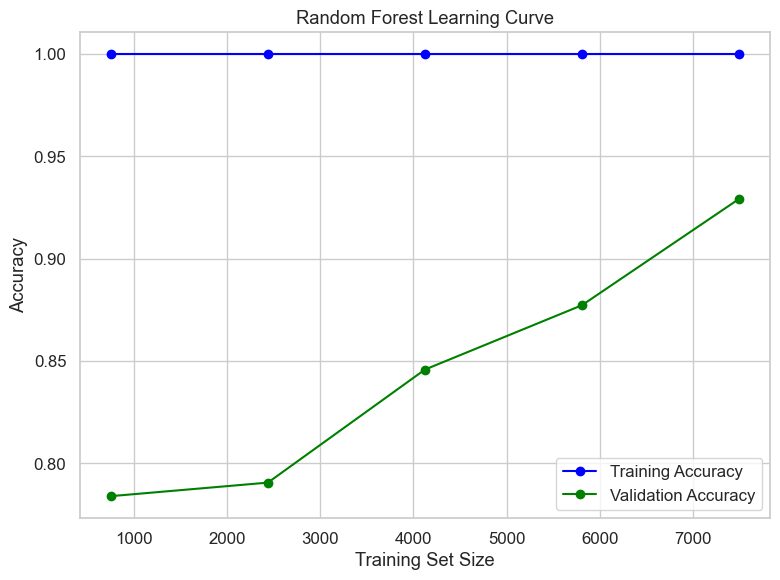


# future scope

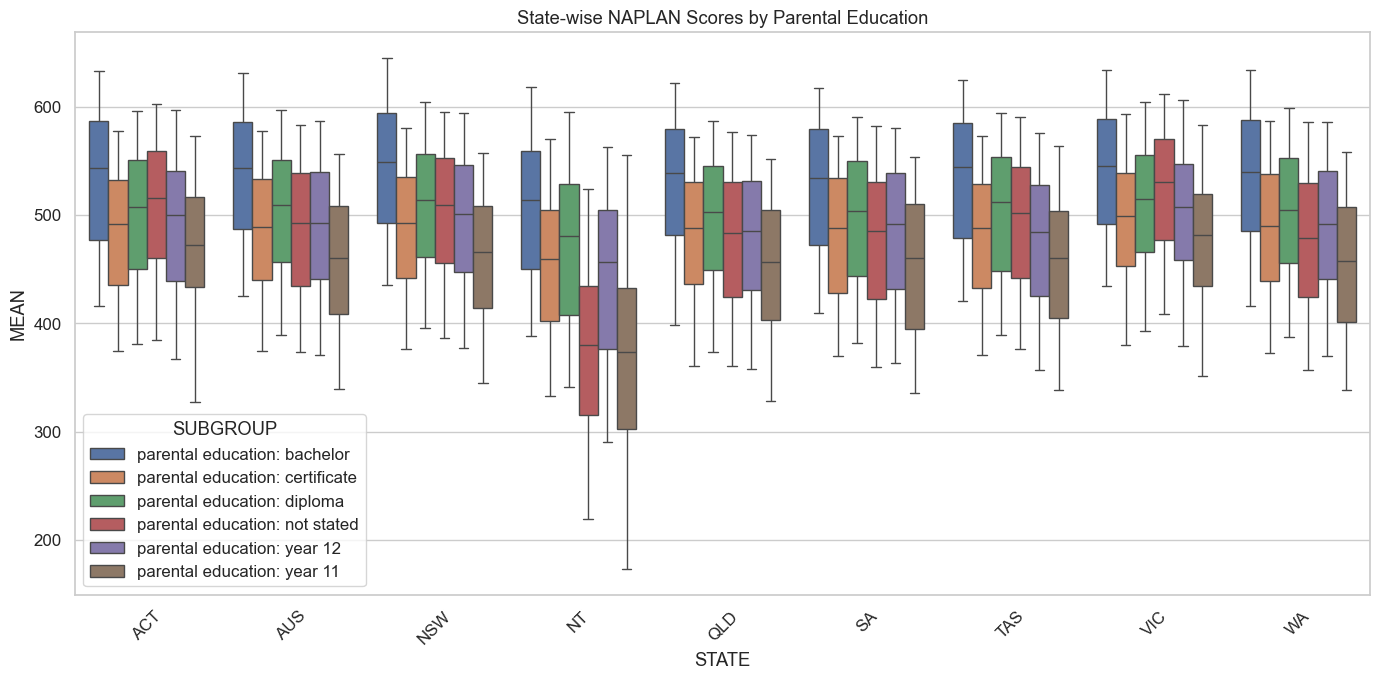

In [27]:
# Load full dataset
df_all = pd.read_excel("naplan 08-22.xlsx", sheet_name="Data")
df_all['SUBGROUP'] = df_all['SUBGROUP'].str.lower().str.strip()
df_all['STATE'] = df_all['STATE'].str.upper().str.strip()

# Filter for parental education
edu_states = df_all[df_all['SUBGROUP'].str.contains("parental education")]

# Compare average MEAN by state
state_summary = edu_states.groupby(["STATE", "SUBGROUP"])["MEAN"].mean().reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.boxplot(data=edu_states, x="STATE", y="MEAN", hue="SUBGROUP")
plt.title("State-wise NAPLAN Scores by Parental Education")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


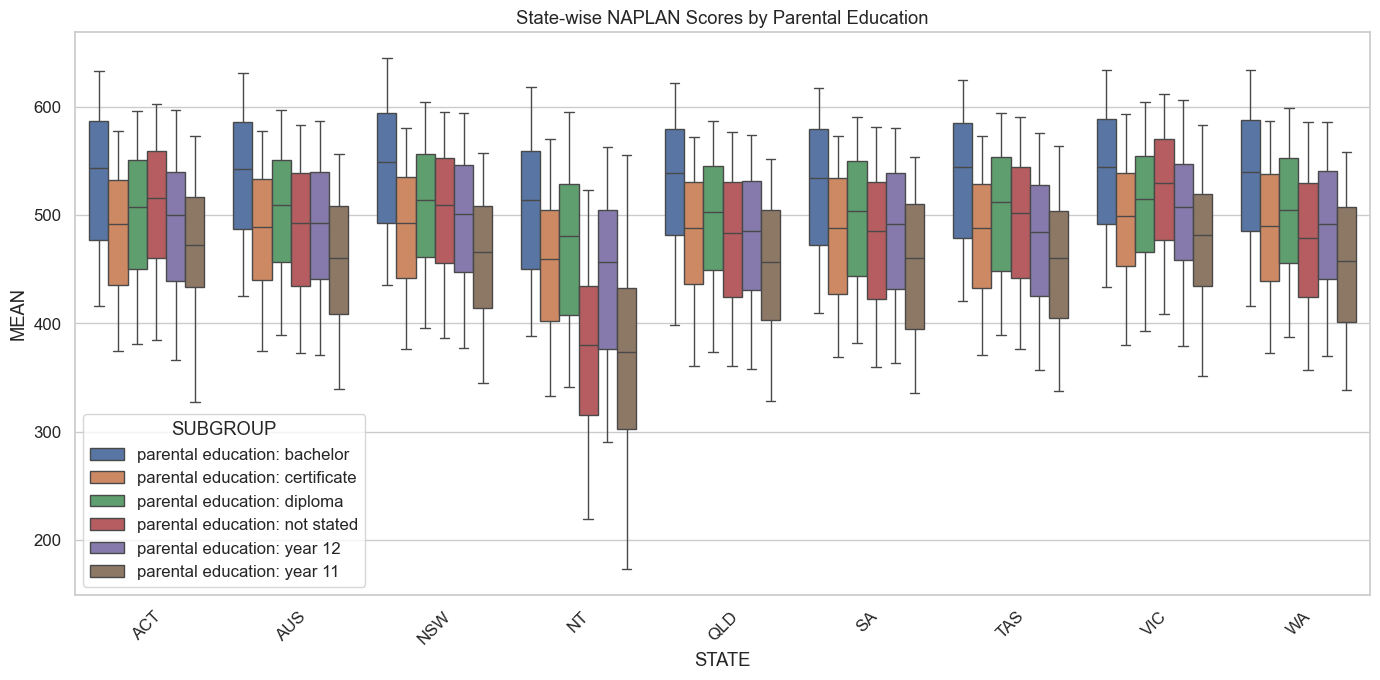

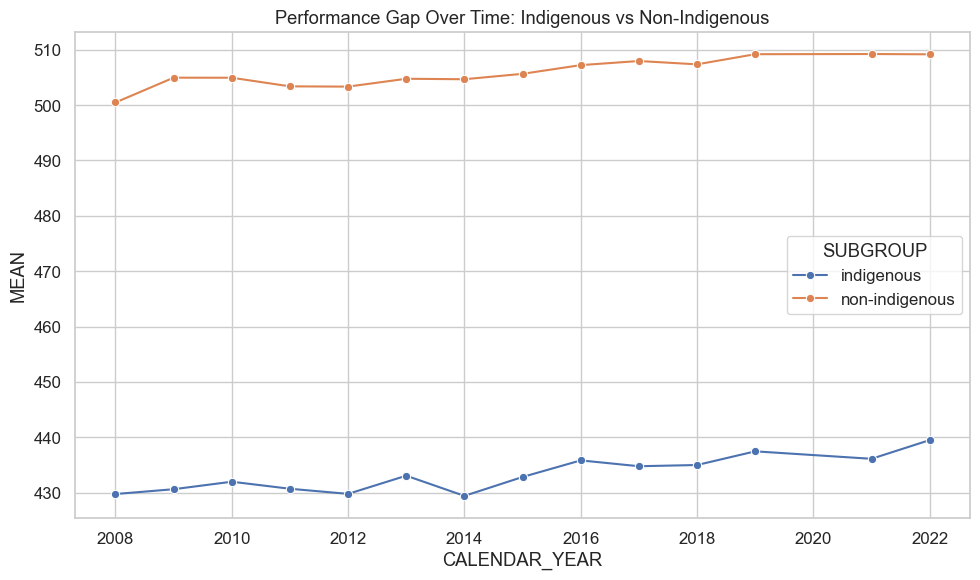

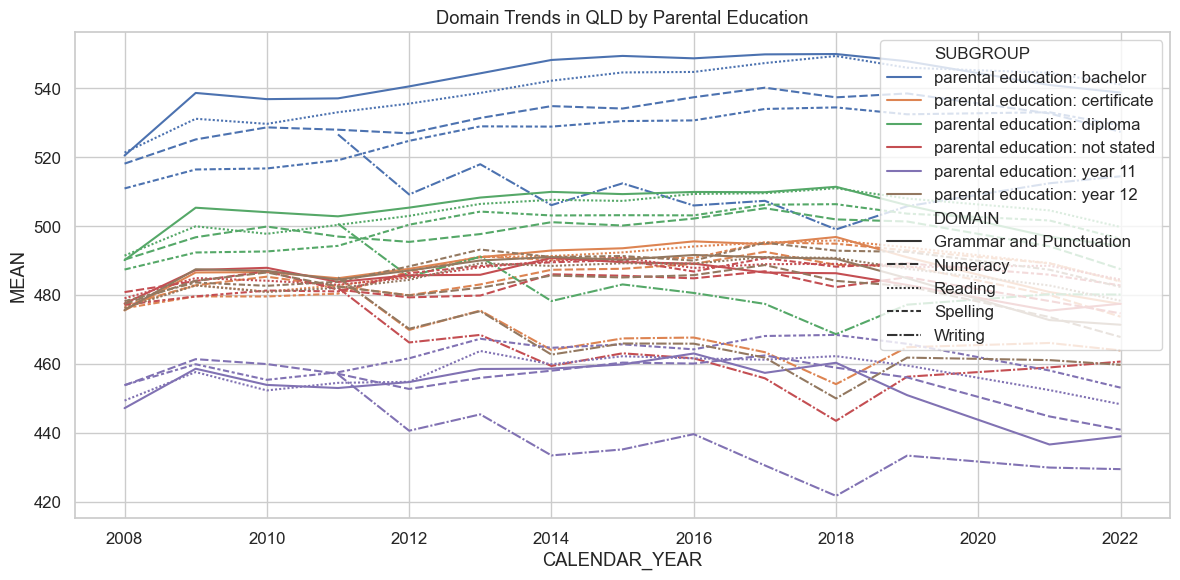

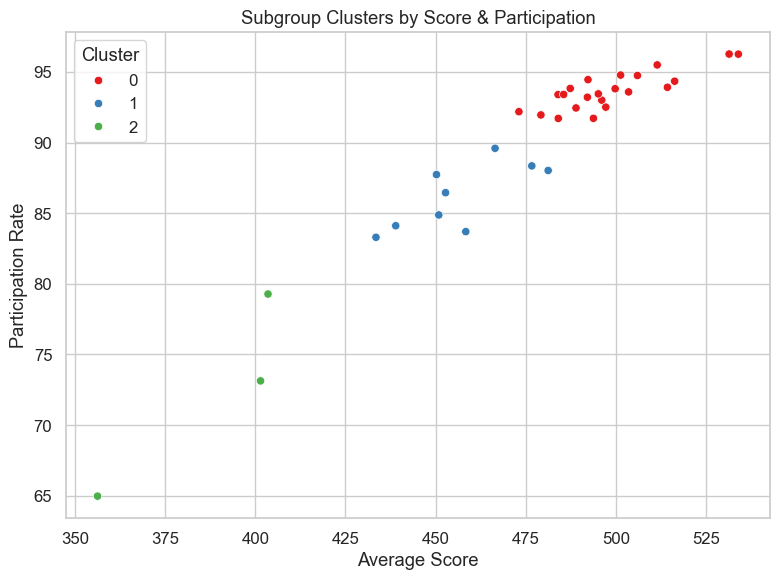

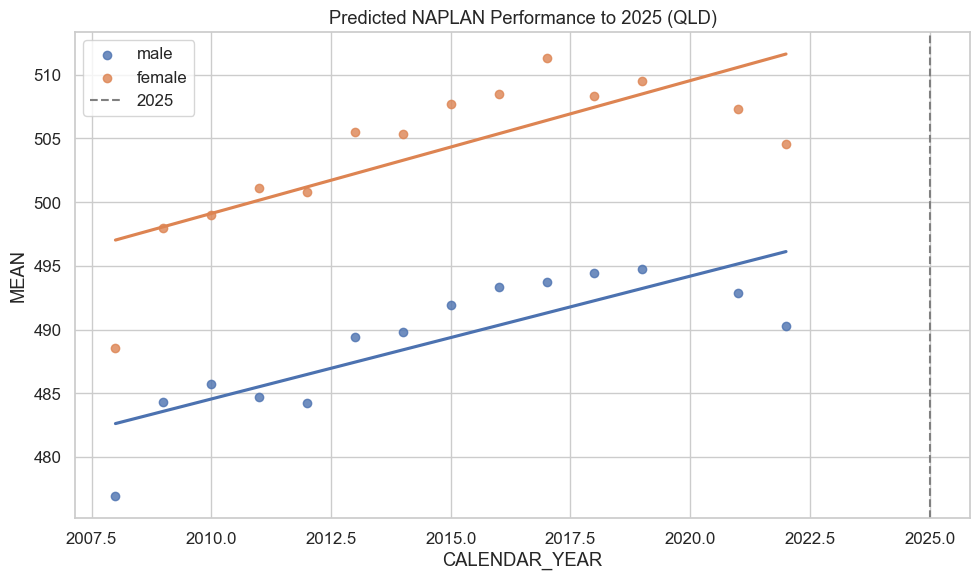

In [105]:
# 🔮 Future Scope Code for NAPLAN Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load full dataset
full_df = pd.read_excel("naplan 08-22.xlsx", sheet_name="Data")
full_df['SUBGROUP'] = full_df['SUBGROUP'].str.strip().str.lower()
full_df['STATE'] = full_df['STATE'].str.upper().str.strip()

# 1. State-wise Comparison: Parental Education ---
edu_states = full_df[full_df['SUBGROUP'].str.contains("parental education")]

plt.figure(figsize=(14, 7))
sns.boxplot(data=edu_states, x="STATE", y="MEAN", hue="SUBGROUP")
plt.title("State-wise NAPLAN Scores by Parental Education")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [25]:
#  2. Longitudinal Gap Between Indigenous & Non-Indigenous ---
gap_df = full_df[full_df['SUBGROUP'].isin(['indigenous', 'non-indigenous'])]
gap_grouped = gap_df.groupby(['CALENDAR_YEAR', 'SUBGROUP'])['MEAN'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=gap_grouped, x="CALENDAR_YEAR", y="MEAN", hue="SUBGROUP", marker="o")
plt.title("Performance Gap Over Time: Indigenous vs Non-Indigenous")
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'full_df' is not defined

In [4]:
#  3. Domain-Specific Trends by Parental Education ---
domain_edu = full_df[(full_df['SUBGROUP'].str.contains("parental education")) &
                     (full_df['STATE'] == 'QLD')]
domain_grouped = domain_edu.groupby(['CALENDAR_YEAR', 'DOMAIN', 'SUBGROUP'])['MEAN'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=domain_grouped, x="CALENDAR_YEAR", y="MEAN", hue="SUBGROUP", style="DOMAIN")
plt.title("Domain Trends in QLD by Parental Education")
plt.tight_layout()
plt.show()


NameError: name 'full_df' is not defined

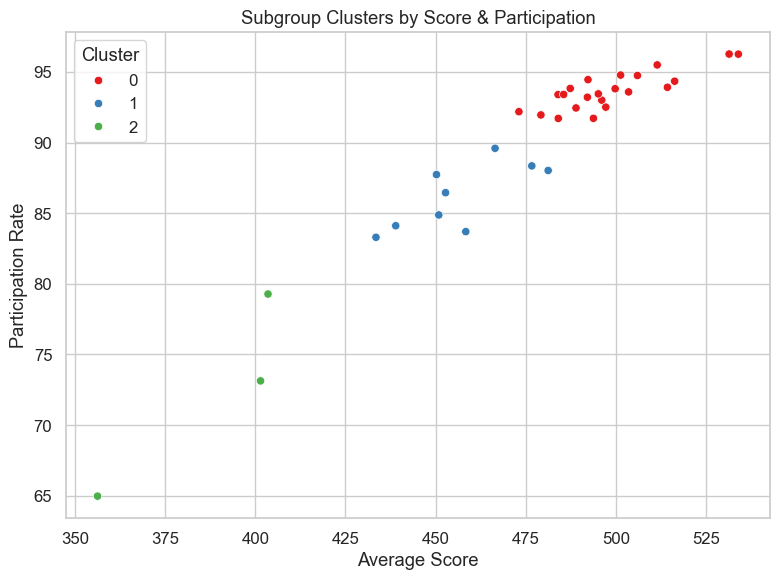

In [111]:
# --- 4. Clustering Subgroups (example with KMeans) ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: average scores by subgroup
subgroup_perf = full_df.groupby("SUBGROUP")[['MEAN', 'PARTICIPATION_RATE']].mean().dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subgroup_perf)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
subgroup_perf['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=subgroup_perf['MEAN'], y=subgroup_perf['PARTICIPATION_RATE'], hue=subgroup_perf['Cluster'], palette="Set1")
plt.title("Subgroup Clusters by Score & Participation")
plt.xlabel("Average Score")
plt.ylabel("Participation Rate")
plt.tight_layout()
plt.show()

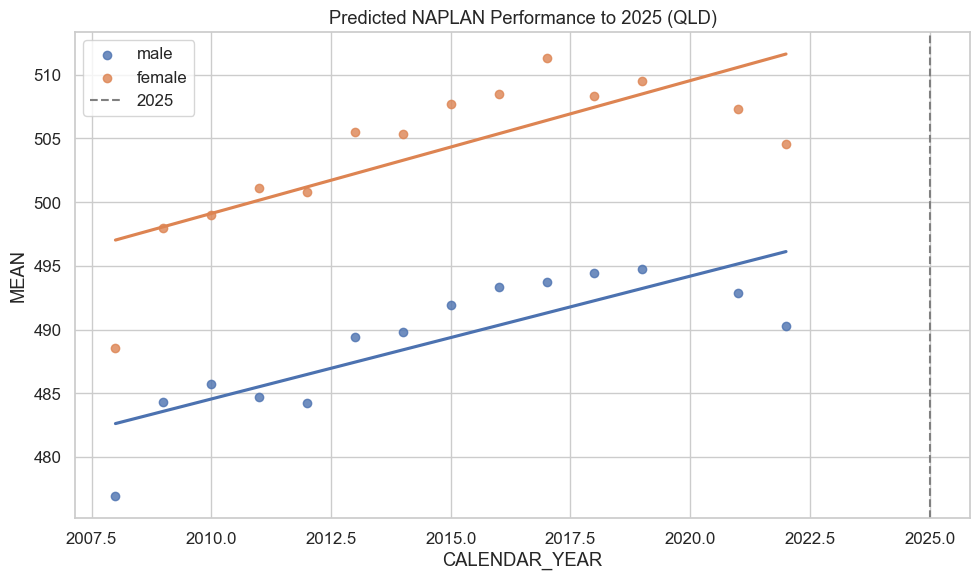

In [113]:
# --- 5. Trend Forecasting to 2025 (simple extrapolation) ---
predict_trend_df = full_df[full_df['SUBGROUP'].isin(['male', 'female']) & (full_df['STATE'] == 'QLD')]
predict_grouped = predict_trend_df.groupby(['CALENDAR_YEAR', 'SUBGROUP'])['MEAN'].mean().reset_index()

plt.figure(figsize=(10, 6))
for group in ['male', 'female']:
    sub = predict_grouped[predict_grouped['SUBGROUP'] == group]
    sns.regplot(x=sub['CALENDAR_YEAR'], y=sub['MEAN'], order=1, label=group, ci=None)

plt.axvline(2025, color='gray', linestyle='--', label='2025')
plt.title("Predicted NAPLAN Performance to 2025 (QLD)")
plt.legend()
plt.tight_layout()
plt.show()